# Wisconsin Breast Cancer Data Analysis - Data Cleaning

## Introduction
Early detection of the malignancy of a breast lump is the key to high probability of survival of breast cancer. Many imaging techniques have been developed for detection breast cancer. In this project, we will use Machine learning algorithms to accurately classify disgonosis from a breast imaging.

### Dataset

The Wisconsin Breast Cancer (Diagnostic) dataset has been extracted from Kaggle. It has 569 items out of which 212 are Malignant and 357 are benign. Ten real-valued features including:

- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness ($\text{perimeter}^2$ / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour) 
- symmetry
- fractal dimension ("coastline approximation" - 1)

There are three different measurements computed for each of the features described above:
- Mean values
- Standard Error
- Worst or Largest Values
Making it a total of 32 features, including id and diagnosis. 

## Objective
The aim of this data analysis project is to work users through the process of classifying the data into two classes of diagnosis - Malignant & Benign, using Machine learning algorithms. 

The project will be divided into three notebooks.
- The current notebook will discuss the data cleaning/processing
- A second notebook containing summary statistics process
- A third notebook containing the Machine Learning process.

In [1]:
#Import all packages needed
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#read csv file and display 2 lines of dataframe
df = pd.read_csv("data.csv")
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [3]:
#print a concise summary of a dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


**Observation**

The dataset looks clean with no missing values, and all features are of correct data types. But for an effective Machine learning, data looks unbalanced and has to be normalized.



### Data Cleaning


Things to be done

1) Drop irrelevant columns ['Unnamed','id']

2) Group Data into three parts, (mean values, se values and worst values) and save.

3) Standardize feature data using Standard Scaler Library in Scikit learn. 

4) Rename the values in diagnosis column

In [5]:
#drop unwanted columns
df.drop(['Unnamed: 32', 'id'],axis=1,inplace=True)

In [6]:
print(list(df.columns))

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [7]:
#rename the M and B values in diagnosis to Malignant and Benign
df['diagnosis'].replace(['M', 'B'], ['Malignant','Benign'], inplace=True)
print(df['diagnosis'].value_counts()) #confirm update

Benign       357
Malignant    212
Name: diagnosis, dtype: int64


## Data Exploration

### What is the percentage proportion of Malignant:Benign tumor in the data set?

In [8]:
df_m = df[df['diagnosis']=='Malignant']
df_b = df[df['diagnosis']=='Benign']

In [9]:
#prop = (df['diagnosis'].value_counts()[1]/  df['diagnosis'].value_counts()[0]) * 100
prop_m = len(df_m['diagnosis'])/(len(df_b['diagnosis']) + len(df_m['diagnosis']))*100
prop_b = len(df_b['diagnosis'])/(len(df_b['diagnosis']) + len(df_m['diagnosis']))*100

In [10]:

print('Percentage of Malignant tumor is:', round(prop_m,2),'%')
print('Percentage of Benign tumor is:', round(prop_b,2),'%')

Percentage of Malignant tumor is: 37.26 %
Percentage of Benign tumor is: 62.74 %


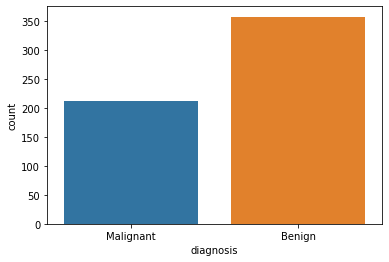

In [11]:
ax = sns.countplot(data = df, x = 'diagnosis');

So it seems more Benign cells were entered more frequently than Malignant cells diagnosis. This implies an unbalanced data.

## Does the size of a tumor affect its malignancy?

Lets see summary statistics about area feature, a good metric for size. Area mean, area se, and area worst point at similar values related to the mean of the cancer cell areas, estimated means, standard errors, and radius means indicate a range between the center and point on the perimeter.

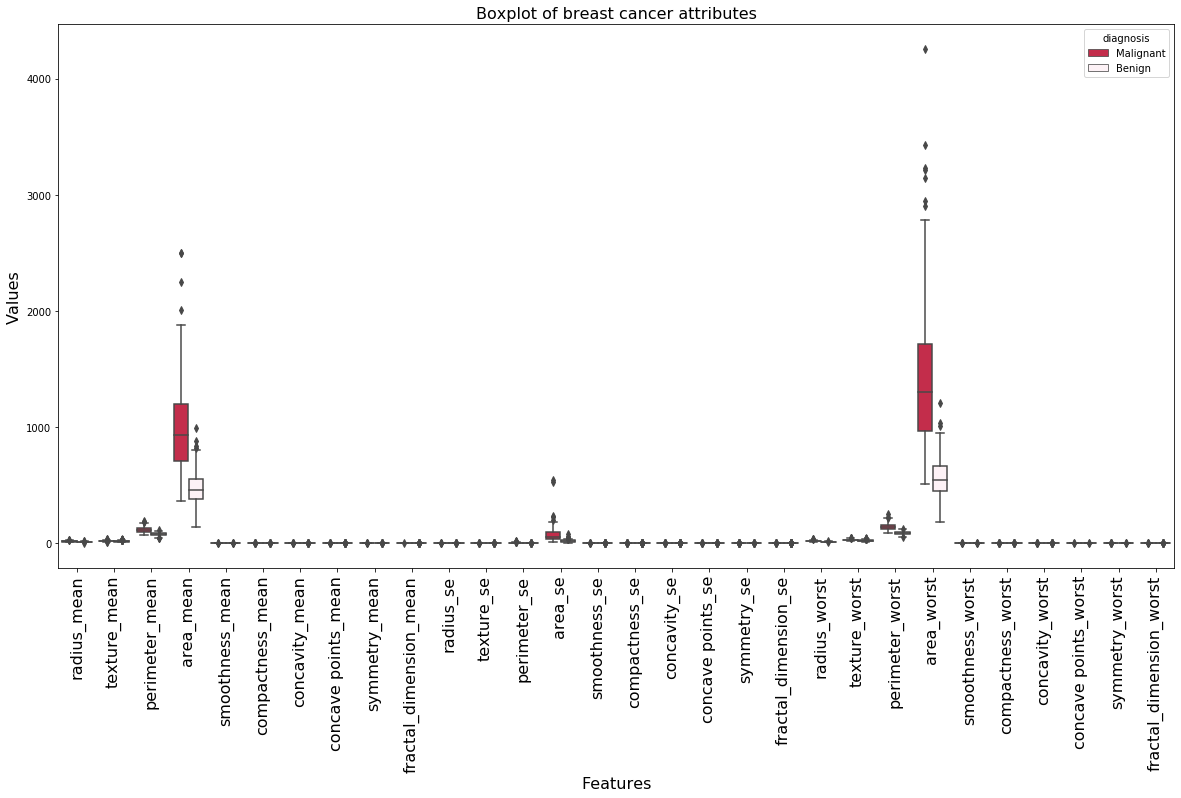

In [12]:
d_melt = pd.melt(df,"diagnosis",var_name="Features", value_name="Values")
f,ax = plt.subplots(figsize=(20, 10))
colours = ["crimson", "lavenderblush"]
pal=sns.set_palette(sns.color_palette(colours))
boxplot = sns.boxplot(x='Features', y='Values', palette = pal, hue = 'diagnosis',data=d_melt,ax=ax);
boxplot.axes.set_title("Boxplot of breast cancer attributes", fontsize=16)
boxplot.set_xlabel("Features", fontsize=16)
boxplot.set_ylabel("Values", fontsize=16)
plt.xticks(rotation = 90,fontsize = 16)
plt.show()

Observation from the boxplot above shows one of the effects of an unbalanced data, where the value of a variable supresses other variables in the data due to its large size. We will revesit this bocplot later in our Machine learning notbook when the data has been normalized. However comparing the median line of the benign boxplots which falls outside that of the Malignant boxplots, it follows that area_mean and area_worst are strong features for predicting the outcome of cancer diagnosis.

Let us look at the correlatio matrix.

### Corelation matrix

We define features that correlated and uncorrelated with diagnosis as those with correlation coefficients greater than 2 and less than or equal to 2 respectively.

In [13]:
# map the diagnosis feature to [0, 1] where 0 = Benign, 1 = Malignancy
df['diagnosis'].replace(['Malignant', 'Benign'], [1,0], inplace=True)

cor_matrix = df.corr() # gives correlation matrix

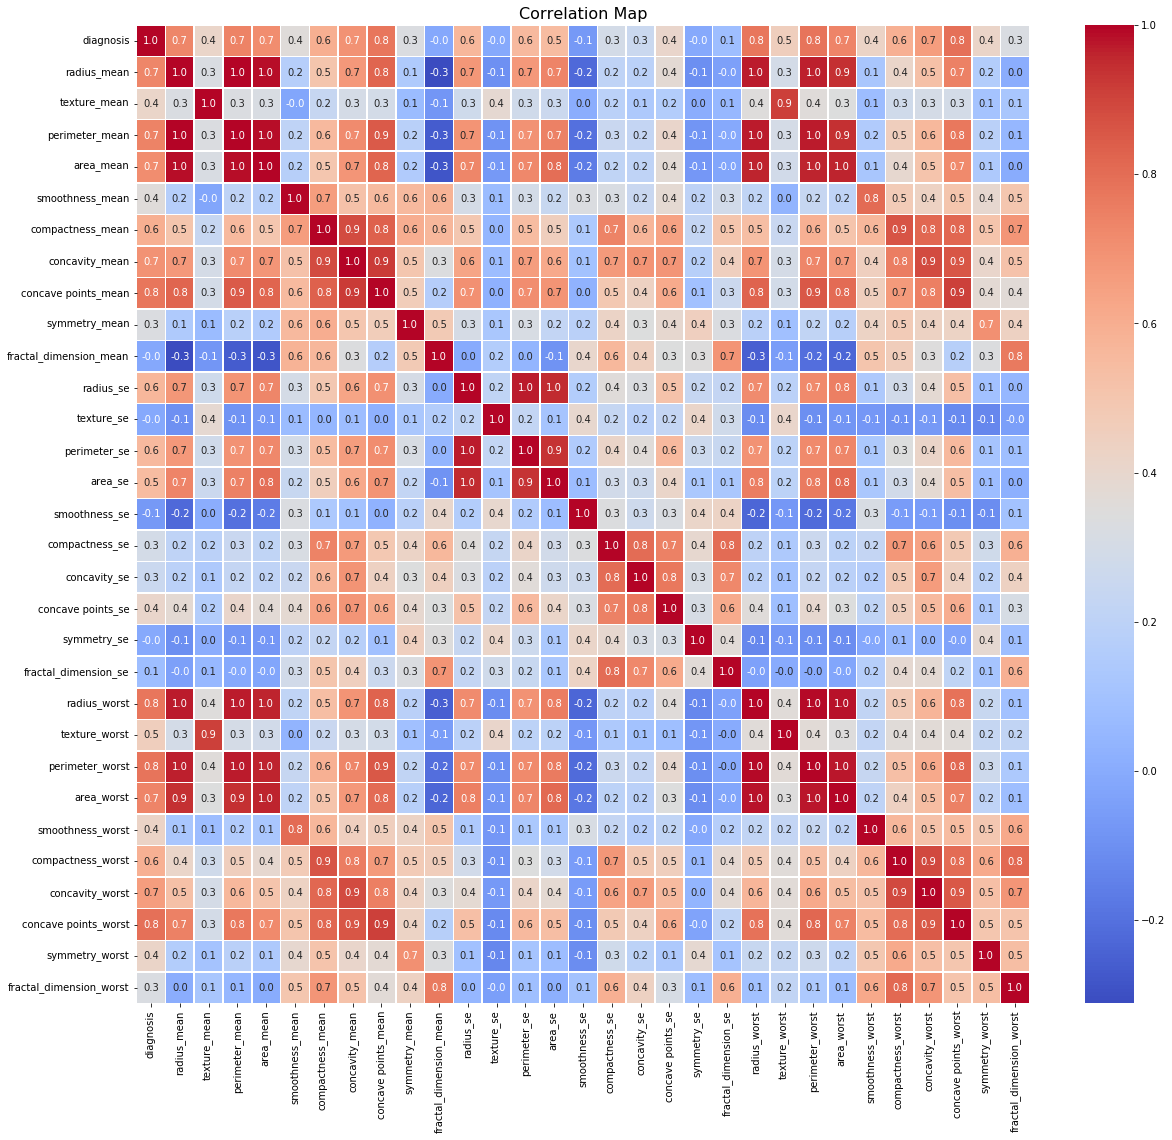

In [14]:
""" Here we plot a Heatmap (correlation matrix) of all features."""
cmap = sns.cm.rocket_r
f,ax = plt.subplots(figsize=(20, 18))
#sns.set(font_scale=1.6)
sns.heatmap(cor_matrix, annot = True,linewidths=.5, cmap = "coolwarm", fmt= '.1f',ax=ax)
plt.title('Correlation Map',fontsize=16);

### Which features are strong predictors of diagnosis of breast cancer?

- To answer this question, we will first split the data into features that are correlated and uncorrelated with diagnosis respectively.
- Then we will look at probability distribution function of each feature


In [15]:
#Correlation with output variable

cor_diagnosis = abs(cor_matrix["diagnosis"])

correlated_features = cor_diagnosis[cor_diagnosis >0.2]  #Selecting correlated features
uncorrelated_features = cor_diagnosis[cor_diagnosis <= 0.2] #Selecting uncorrelated features

print("The features that are uncorrelated with diagnosis are: \n")
print(correlated_features.sort_values(ascending=False))
print()
print("The features that strongly correlated with diagnosis are: \n")
print(uncorrelated_features.sort_values(ascending=False))



The features that are uncorrelated with diagnosis are: 

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
Name: d

So we see that concave points_worst has the highest correlation with diagnosis with correlation coefficient r = 0.793566. Similarly, symmetry_se has the least correlation with diagnosis.

### Probability Distribution Function (PDF) 

The pdf of a curve can help us to identify the underlying distribution of that feature. A fair or no overlap will be informative (thus providing high classification accuracy in a machine learning algorithm) while a heavy overlap will be uninformative.

We will look at the PDFs of the mean value features, then standard error and finally maximum values.

**Mean value attributes** 

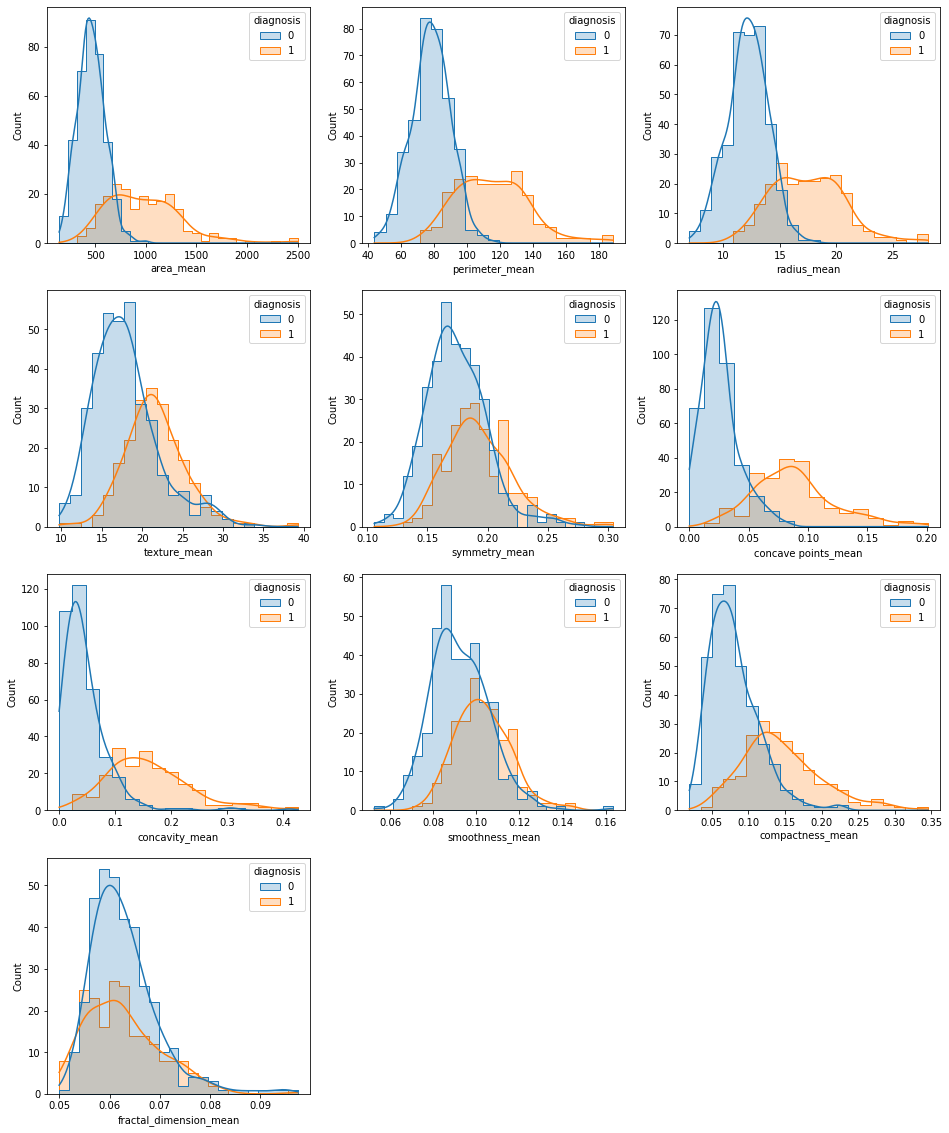

In [16]:
sns.set_palette('tab10')
mean_list = ["area_mean","perimeter_mean", "radius_mean", "texture_mean", "symmetry_mean", "concave points_mean", "concavity_mean","smoothness_mean","compactness_mean","fractal_dimension_mean"]
fig = plt.figure(figsize=(16,20))
for i, feature in enumerate(mean_list):
    plt.subplot(4,3,i+1)
    sns.histplot(data=df, x= feature, hue='diagnosis',kde=True,element="step");


**Observation**

- The distributions in fractal_dimension_mean are nearly overlapping, also smoothness_mean and symmetry_mean. When we examine the values of their low correlation coefficients with diagnosis, it is obvious that they are weak features for predicting breast cancer diagnosis. 

- Features like concave points_mean, concavity_mean, perimeter_mean (area_mean and radius_mean), compactness_mean have fairly overlapping pdfs thus are strong predictors of breast cancer diagnosis.

- What we can learn from area_mean (likewise perimeter_mean, and radius_mean) pdf,  is that a diagnosis with larger cell size is obviously Malignant since Malignant tumors are generally larger in size than Benign tumor as seen in the figure, but we cannot conclude that tumor size affects the malignancy of a tumor neither can we learn whether a given tumor is Benign nor Malignant. These we can draw from Machine learning algorithms or inferential statistics.

**Standard Error**

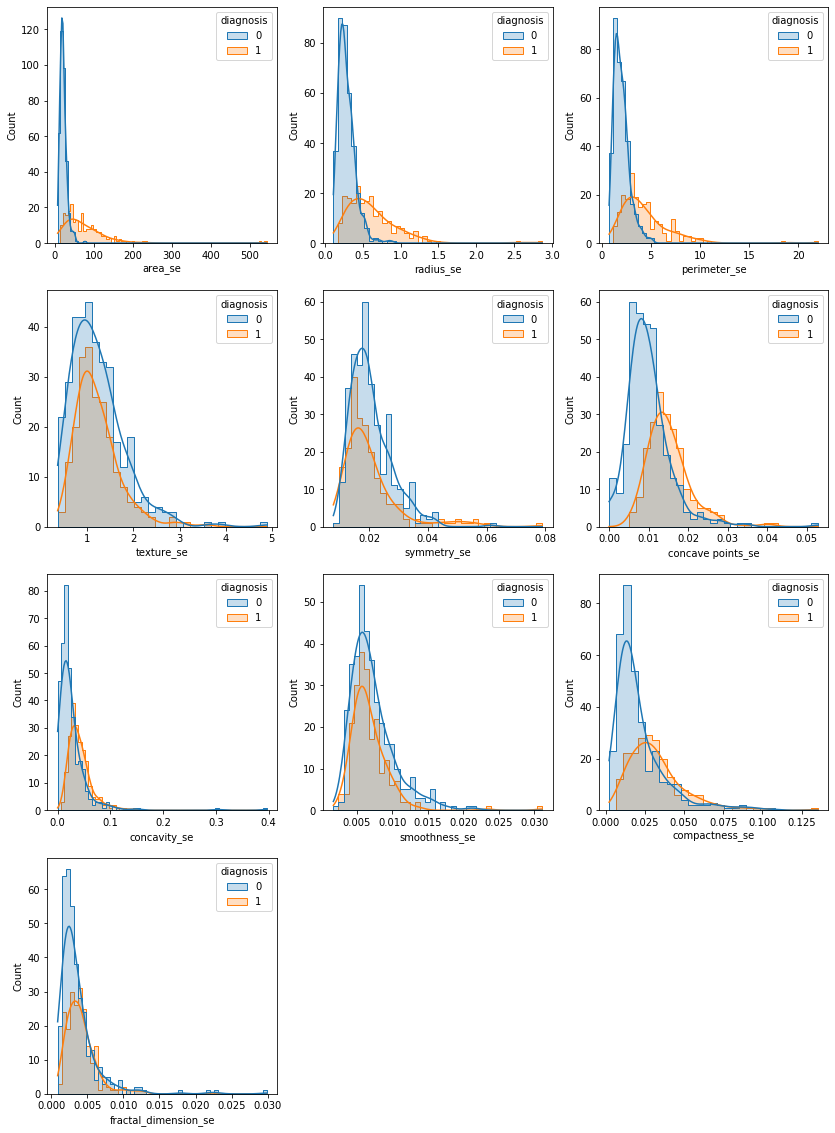

In [17]:
se_list = ["area_se", "radius_se", "perimeter_se", "texture_se", "symmetry_se", "concave points_se", "concavity_se","smoothness_se","compactness_se","fractal_dimension_se"]
fig = plt.figure(figsize=(14,20))
for i, feature in enumerate(se_list):
    plt.subplot(4,3,i+1)
    sns.histplot(data=df, x= feature, hue='diagnosis',kde=True,element="step");



**Observation**

- Again here, area_se, radius_se, perimeter_se, and concave points_se, are strong features that may help us correctly classify breast cancer tumor diagnosis. 

- The distributions in fractal_dimension_se are almost overlapping, also smoothness_se, texture_se and symmetry_se respectively. These features have approximately zero correlation coefficient with diagosis thus they are weak features for predicting breast cancer diagnosis.

**Maximum/Worst attributes**

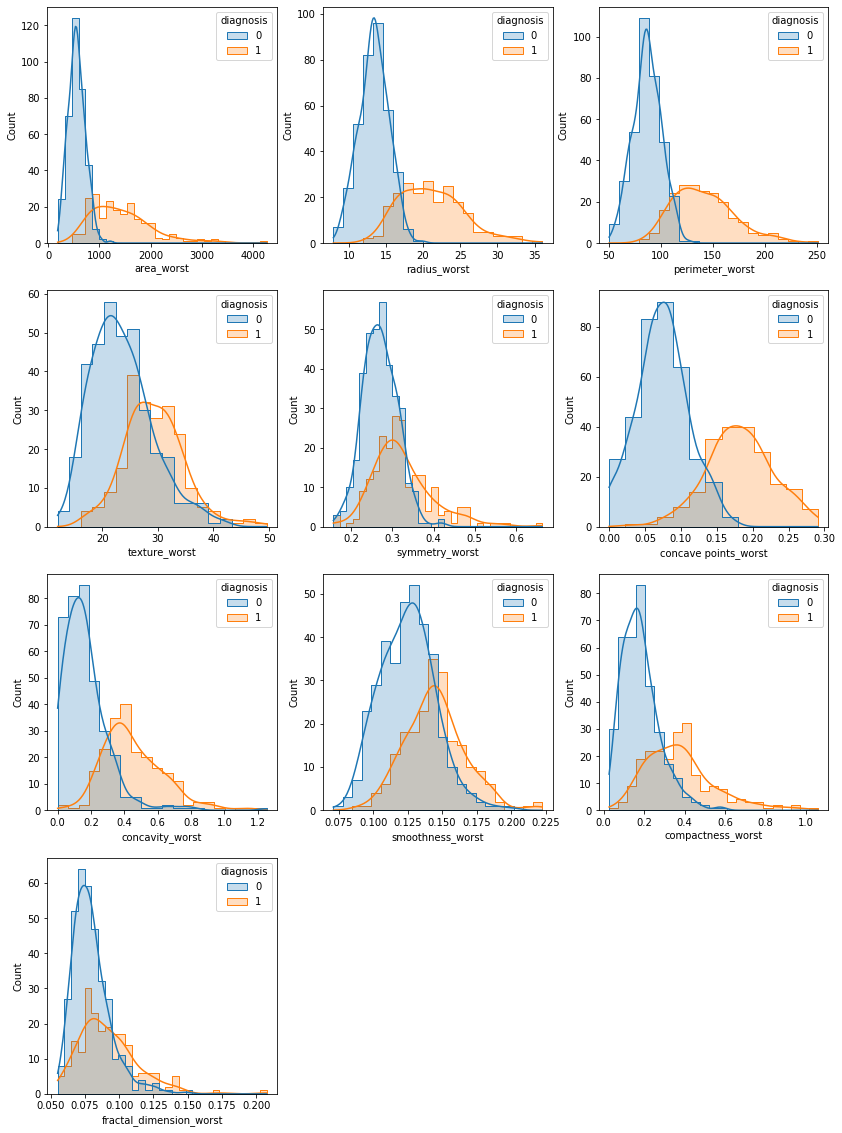

In [18]:
max_list = ["area_worst", "radius_worst", "perimeter_worst", "texture_worst", "symmetry_worst", "concave points_worst", "concavity_worst","smoothness_worst","compactness_worst","fractal_dimension_worst"]
fig = plt.figure(figsize=(14,20))
for i, feature in enumerate(max_list):
    plt.subplot(4,3,i+1)
    sns.histplot(data=df, x= feature, hue='diagnosis',kde=True,element="step");



**Observation**

- In the figure above, we see here again that radius_worst, perimeter_worst, concavity_worst, concave points_worst, and compactness_worst with distinct pdfs, are strong features for predicting breast cancer tumor diagnosis.

- Although fractal_dimension_wors,smoothness_worst, symmetry_worst and texture_worst do have fairly distinct pdfs of diagnosis output, they are weak predictors for breast ancer tumor diagnosis.

## General Comment on the PDFs

This method of feature selection for Machine learning algorithm is not very accurate. A more accurate method for feature selection will be discussed in the future Machine learning notebook. 

The next thing we would like to check for is multicollinearity. For the purpose of Machine learning, it is important to eliminate redundant features. These are independent features that are strongly correlated with themselves. 

To do:

- We will create a new dataframe containing i) the correlated (relevant_features) and ii) uncorrelated (relevat_features_n) features with diagnosis.
- Then we will query the new datasets for pairs of independent features with high correlation coefficients greater than or equal to 0.6
- Finally we will create a scatter plot of these gihly correlated pairs.

## How are independent features related to themselves?

### New dataframe

In [19]:
d_cor = df[correlated_features.index] 
d_uncor = df[uncorrelated_features.index]

In [20]:
#exclude diagnosis from d_rel dataframe
cor = d_cor.iloc[:,1:] 
cor.head(2)  # print few lines to test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,1.0950,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.5435,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [21]:
d_uncor.head(2)

,fractal_dimension_mean,texture_se,smoothness_se,symmetry_se,fractal_dimension_se
0,0.07871,0.9053,0.006399,0.03003,0.006193
1,0.05667,0.7339,0.005225,0.01389,0.003532


### Querying rel dataframe for correlated feature pairs

In [22]:
perfect_cor= list() #container or the perfectly correlated feature pairs
very_strong_cor = list() #container or the very strongly correlated feature pairs
strong_cor = list() #container or the strongly correlated feature pairs

col = cor.columns
for i in range(0, cor.shape[1]):
    for j in range(0, i+1):
        if abs(cor[col[i]].corr(cor[col[j]]))> 0.99 and col[i] != col[j]:
            perfect_cor.append([col[i],col[j]])
        elif abs(cor[col[i]].corr(cor[col[j]]))> 0.8 and col[i] != col[j]:
            very_strong_cor.append((col[i],col[j]))
        elif abs(cor[col[i]].corr(cor[col[j]]))> 0.6 and col[i] != col[j]:
            strong_cor.append((col[i],col[j]))
        
         
#col[i] != col[j] excludes diagonal elements         
            
print("There are {} perfectly correlated paira".format(len(perfect_cor)))
print("There are {} perfectly correlated paira".format(len(very_strong_cor)))
print("There are {} perfectly correlated paira".format(len(strong_cor)))
print()
#Here we print few lines of list items for the list with length greater than 5
print("Perfectly correlated features:",perfect_cor)
print()
print("Very strongly correlated features:",very_strong_cor[:5])
print()
print("Strongly correlated features:",strong_cor[:5])

There are 2 perfectly correlated paira
There are 41 perfectly correlated paira
There are 56 perfectly correlated paira

Perfectly correlated features: [['perimeter_mean', 'radius_mean'], ['perimeter_worst', 'radius_worst']]

Very strongly correlated features: [('area_mean', 'radius_mean'), ('area_mean', 'perimeter_mean'), ('concavity_mean', 'compactness_mean'), ('concave points_mean', 'radius_mean'), ('concave points_mean', 'perimeter_mean')]

Strongly correlated features: [('compactness_mean', 'smoothness_mean'), ('concavity_mean', 'radius_mean'), ('concavity_mean', 'perimeter_mean'), ('concavity_mean', 'area_mean'), ('symmetry_mean', 'compactness_mean')]


### Querying d_rel_n dataframe for correlated feature pairs

In [23]:
perfect_uncor= list() #container for the perfectly correlated feature pairs
very_strong_uncor = list() #container for the very strongly correlated feature pairs
strong_uncor = list() #container for the strongly correlated feature pairs
col_n = d_uncor.columns
for i in range(0, d_uncor.shape[1]):
    for j in range(0, i+1):
        if abs(d_uncor[col_n[i]].corr(d_uncor[col_n[j]]))> 0.99 and col_n[i] != col_n[j]:
            perfect_uncor.append([col_n[i],col_n[j]])
        elif abs(d_uncor[col_n[i]].corr(d_uncor[col_n[j]]))> 0.8 and col_n[i] != col_n[j]:
            very_strong_uncor.append((col_n[i],col_n[j]))
        elif abs(d_uncor[col_n[i]].corr(d_uncor[col_n[j]]))> 0.6 and col_n[i] != col_n[j]:
            strong_uncor.append((col_n[i],col_n[j]))
         
#col[i] != col[j] excludes diagonal elements         
            
print("There are {} perfectly correlated pair(s)".format(len(perfect_uncor)))
print("There are {} perfectly correlated pair(s)".format(len(very_strong_uncor)))
print("There are {} perfectly correlated pair(s)".format(len(strong_uncor)))
print()
#Here we print few lines of list items for the list with length greater than 5
print("Perfectly correlated features:",perfect_uncor)
print()
print("Very strongly correlated features:",very_strong_uncor)
print()
print("Strongly correlated features:",strong_uncor)

There are 0 perfectly correlated pair(s)
There are 0 perfectly correlated pair(s)
There are 1 perfectly correlated pair(s)

Perfectly correlated features: []

Very strongly correlated features: []

Strongly correlated features: [('fractal_dimension_se', 'fractal_dimension_mean')]


In [24]:
#test the correlation relationships above
cor_matrix.loc['compactness_mean', 'smoothness_mean']

0.6591232152159219

### Scatter plot of correlated feature pairs

**1) Perfectly strong correlated pairs**

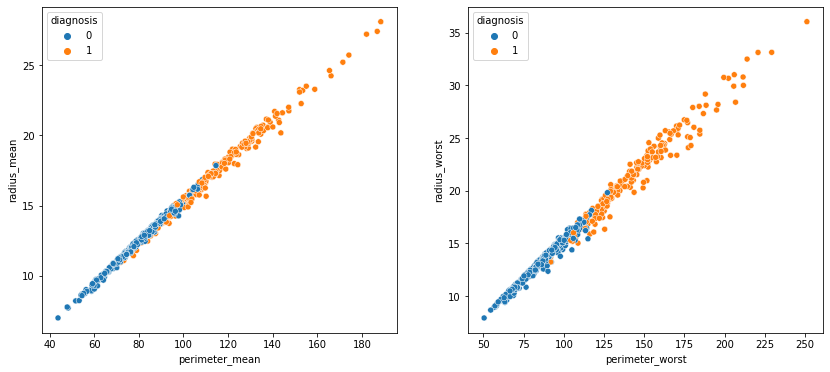

In [25]:
fig = plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x= perfect_cor[0][0], y = perfect_cor[0][1],hue='diagnosis')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x= perfect_cor[1][0], y = perfect_cor[1][1],hue='diagnosis')
plt.show()

**Observation**

- As we have discussed earlier, radius_mean, perimeter_mean, radius_worst and perimeter_worst have strong correlations with diagnosis, as we can see from the scatter plots above. 
- What we also observe is a perfect correlation between radius_mean/worst and perimeter_mean/worst. This is so since perimeter is directly and linearly related with radius through the equation:

$$\text{Area}_{\text{circle}} = \pi * \text{radius}^{2} = \text{perimeter}_{\text{circle}} * \text{radius}/2 $$
where
$$\text{perimeter}_{\text{circle}} = 2* \pi * \text{radius}$$


Therefore, it is advisable to choose one of these parameters during a Machine learning algorithm to avoid redundant information and likewise better accuracy.

**Very strong correlated pairs**

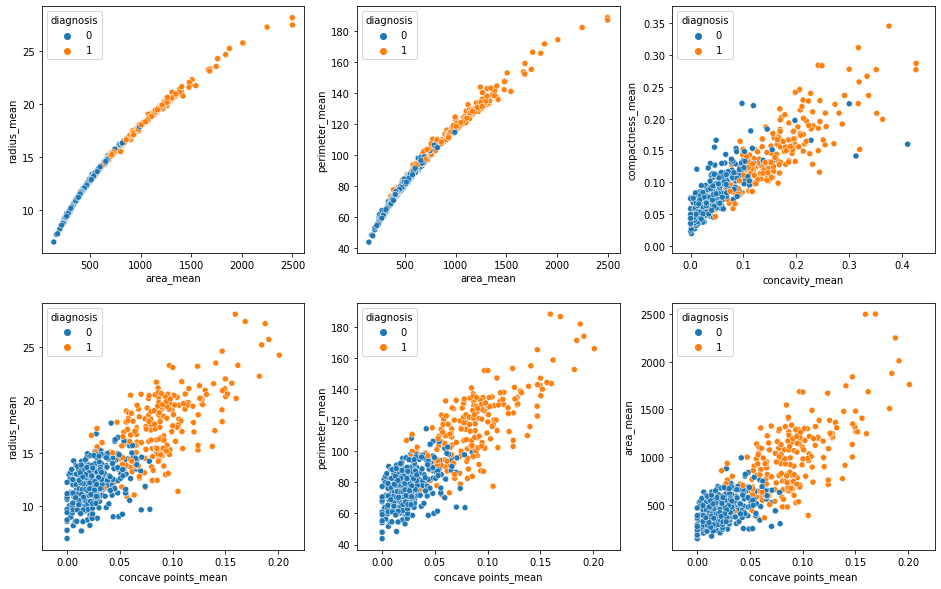

In [26]:
fig = plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.scatterplot(data=df, x= very_strong_cor[0][0], y = very_strong_cor[0][1],hue='diagnosis')
plt.subplot(2,3,2)
sns.scatterplot(data=df, x= very_strong_cor[1][0], y = very_strong_cor[1][1],hue='diagnosis')
plt.subplot(2,3,3)
sns.scatterplot(data=df, x= very_strong_cor[2][0], y = very_strong_cor[2][1],hue='diagnosis')
plt.subplot(2,3,4)
sns.scatterplot(data=df, x= very_strong_cor[3][0], y = very_strong_cor[3][1],hue='diagnosis')
plt.subplot(2,3,5)
sns.scatterplot(data=df, x= very_strong_cor[4][0], y = very_strong_cor[4][1],hue='diagnosis')
plt.subplot(2,3,6)
sns.scatterplot(data=df, x= very_strong_cor[5][0], y = very_strong_cor[5][1],hue='diagnosis')
plt.show()

**Observation**

Again we see pairs of independent features that are correlated with each other and also have strong predicting factor for diagnosis.

**Strong correlated pairs**

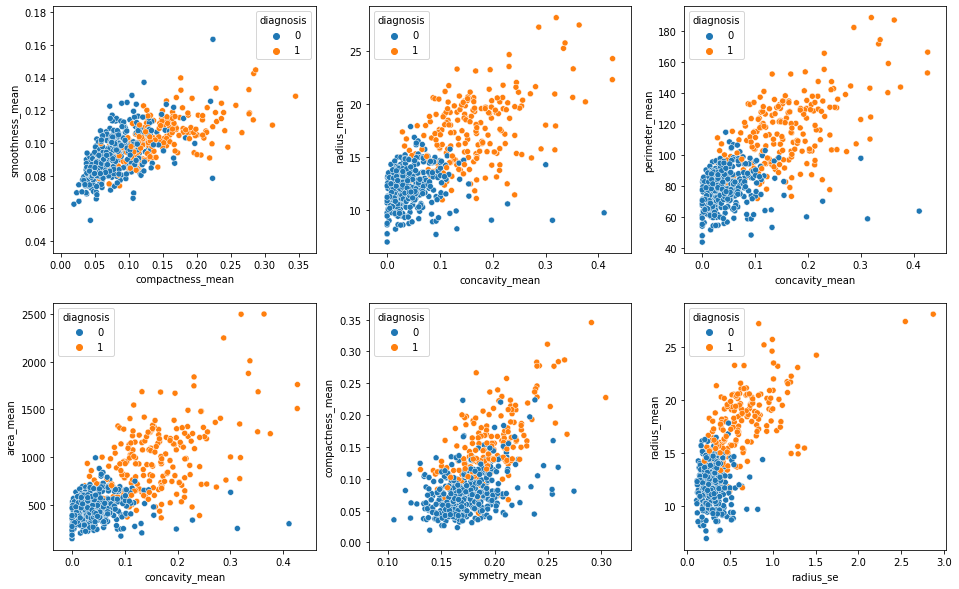

In [27]:
fig = plt.figure(figsize=(16,10))
plt.subplot(2,3,1)
sns.scatterplot(data=df, x= strong_cor[0][0], y = strong_cor[0][1],hue='diagnosis')
plt.subplot(2,3,2)
sns.scatterplot(data=df, x= strong_cor[1][0], y = strong_cor[1][1],hue='diagnosis')
plt.subplot(2,3,3)
sns.scatterplot(data=df, x= strong_cor[2][0], y = strong_cor[2][1],hue='diagnosis')
plt.subplot(2,3,4)
sns.scatterplot(data=df, x= strong_cor[3][0], y = strong_cor[3][1],hue='diagnosis')
plt.subplot(2,3,5)
sns.scatterplot(data=df, x= strong_cor[4][0], y = strong_cor[4][1],hue='diagnosis')
plt.subplot(2,3,6)
sns.scatterplot(data=df, x= strong_cor[5][0], y = strong_cor[5][1],hue='diagnosis')
plt.show()

Here the correlation between independent pairs are starting to get irregular.

**Strong uncorrelated pairs**

These are independent features which are uncorrelated with diagnosis, but show strong correlation with each other.

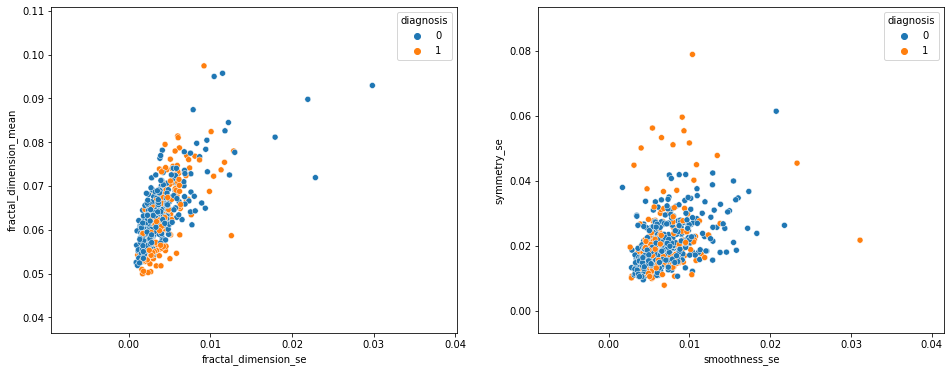

In [28]:
fig = plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(data=df, x= strong_uncor[0][0], y = strong_uncor[0][1],hue='diagnosis')
plt.subplot(1,2,2)
sns.scatterplot(data=df, x= "smoothness_se", y = "symmetry_se",hue='diagnosis')

plt.show()

Fractal_dimension_mean and fractal_dimension_se are uncorrelated with diagonis, but we can see that they are strongly correlated with themselves and thus including the two features would imply redundant information in our future Machine learning algorithm. On the right figure, we see a weak and an irregular correlation relationship.

## Tutorials

We observe from the index above that three different measurements (mean, standard error and maximum) were made per feature. Thus our aim in the subsequent sections is to slice the dataframe into three. This is important if you would ned to work of either on mean dataset or standard error or maximum.

### Indexing and Slicing Data in Pandas
Split the data into three (mean, standard error and maximum)

In [29]:
#mean dataframe
df_transformed_mean = df.iloc[:,:11]
df_transformed_mean.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667


Now that we have a dataframe containing only our mean data, we will rename the column names

In [30]:
#creat a list to store the transformed column names.
l=[]
[l.append(i[:-5]) if 'mean' in i else l.append(i) for i in df_transformed_mean.columns ]
print(l)
        

['diagnosis', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave points', 'symmetry', 'fractal_dimension']


In [31]:
# asign the names in the list l to 
df_transformed_mean.columns = l 
#print 2 lines of dataframe to confirm change
df_transformed_mean.head(2)

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667


Let's save the mean dataframe for use in a future notebook.

In [32]:
df_transformed_mean.to_csv('cancer_data_means.csv', index=False)

### Selecting multiple ranges

Selecting the columns for the mean dataframe was straightforward since the columns we needed to select were all together (diagnosis, and the mean columns). Now we run into a little issue when we try to do the same for the standard errors or worst (or maximum) values. 'diagnosis' is separated from the rest of the columns we need. We can't specify all of these in one range.

We can achieve this by calling a the np.r method in [NumPy](https://numpy.org/doc/stable/reference/generated/numpy.r_.html)

credit to this [stackoverflow link](https://stackoverflow.com/questions/41256648/select-multiple-ranges-of-columns-in-pandas-dataframe)

In [33]:
# create the standard errors dataframe

df_transformed_SE = df.iloc[:, np.r_[:1,11:21]]
df_transformed_SE.columns = l
# view the first few rows to confirm this was successful
df_transformed_SE.head(2)

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,1,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,1,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532


Again let's save the standard errors dataframe for use in a future notebook.

In [34]:
df_transformed_SE.to_csv('cancer_data_SE.csv', index=False)

In [35]:
# create the worst or maximum dataframe

df_transformed_max = df.iloc[:, np.r_[:1,21:31]]
df_transformed_max.columns = l
# view the first few rows to confirm this was successful
df_transformed_max.head(2)

,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,1,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


Again let's save the maximum dataframe for use in a future notebook.

In [36]:
df_transformed_max.to_csv('cancer_data_max.csv', index=False)